
<h1> Owls and Sheep detection using YOLOv8

*   Petra Dadić








**Project introduction:**
The aim of this project is develop and fine-tunine a custom AI model designed to detect and locate two specific objects: sheep and owls using the YOLOv8 (You Only Look Once) framework. The dataset used for training is OpenImagesV7, which contains labeled images of various objects, including sheep and owls.


In this notebook there is both the whole code used to fine tune the models and download the datasets as well as the part that can be used just for predictions on any pictures.

In order for script to run smoothly the files open-imagesv7.yaml and open-imagesv7_augmentations.yaml should be at /content/drive/MyDrive/

In order to use the already trained model to make prediction on your data make sure that you have saved best_model.pt at /content/drive/MyDrive/best_model.pt and run setup and instalation, than you can jump to the Using the model chapter

## Setup and Installation
In this section, YOLOv8 along with other necessary dependencies is installed and imported, and Google Drive is mounted for accessing files.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sun Aug 25 19:43:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import math
from PIL import Image
import numpy as np

#### Yolo instalation

In [5]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 769, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'export', 'benchmark', 'val', 'track', 'train', 'predict'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'segment', 'classify', 'detect', 'pose'}
                MODE (required) is one of {'export', 'benchmark', 'val', 'track', 'train', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

## Dataset Preparation

Dataset Download and Preparation :
Dataset download and filtering is done directly in open-imagesv7.yaml. The data is saved to /content/datasets/fiftyone/open-images-v7
*   Training dataset consists of 2550 images that contain sheep and owls
*   Validation dataset consists of 92 images that contain sheep and owls
*   Test dataset consists of 267  images that contain sheep and owls

Labels are stored in /labels folder as one detections.csv file for each split









Some of the images are shown below.

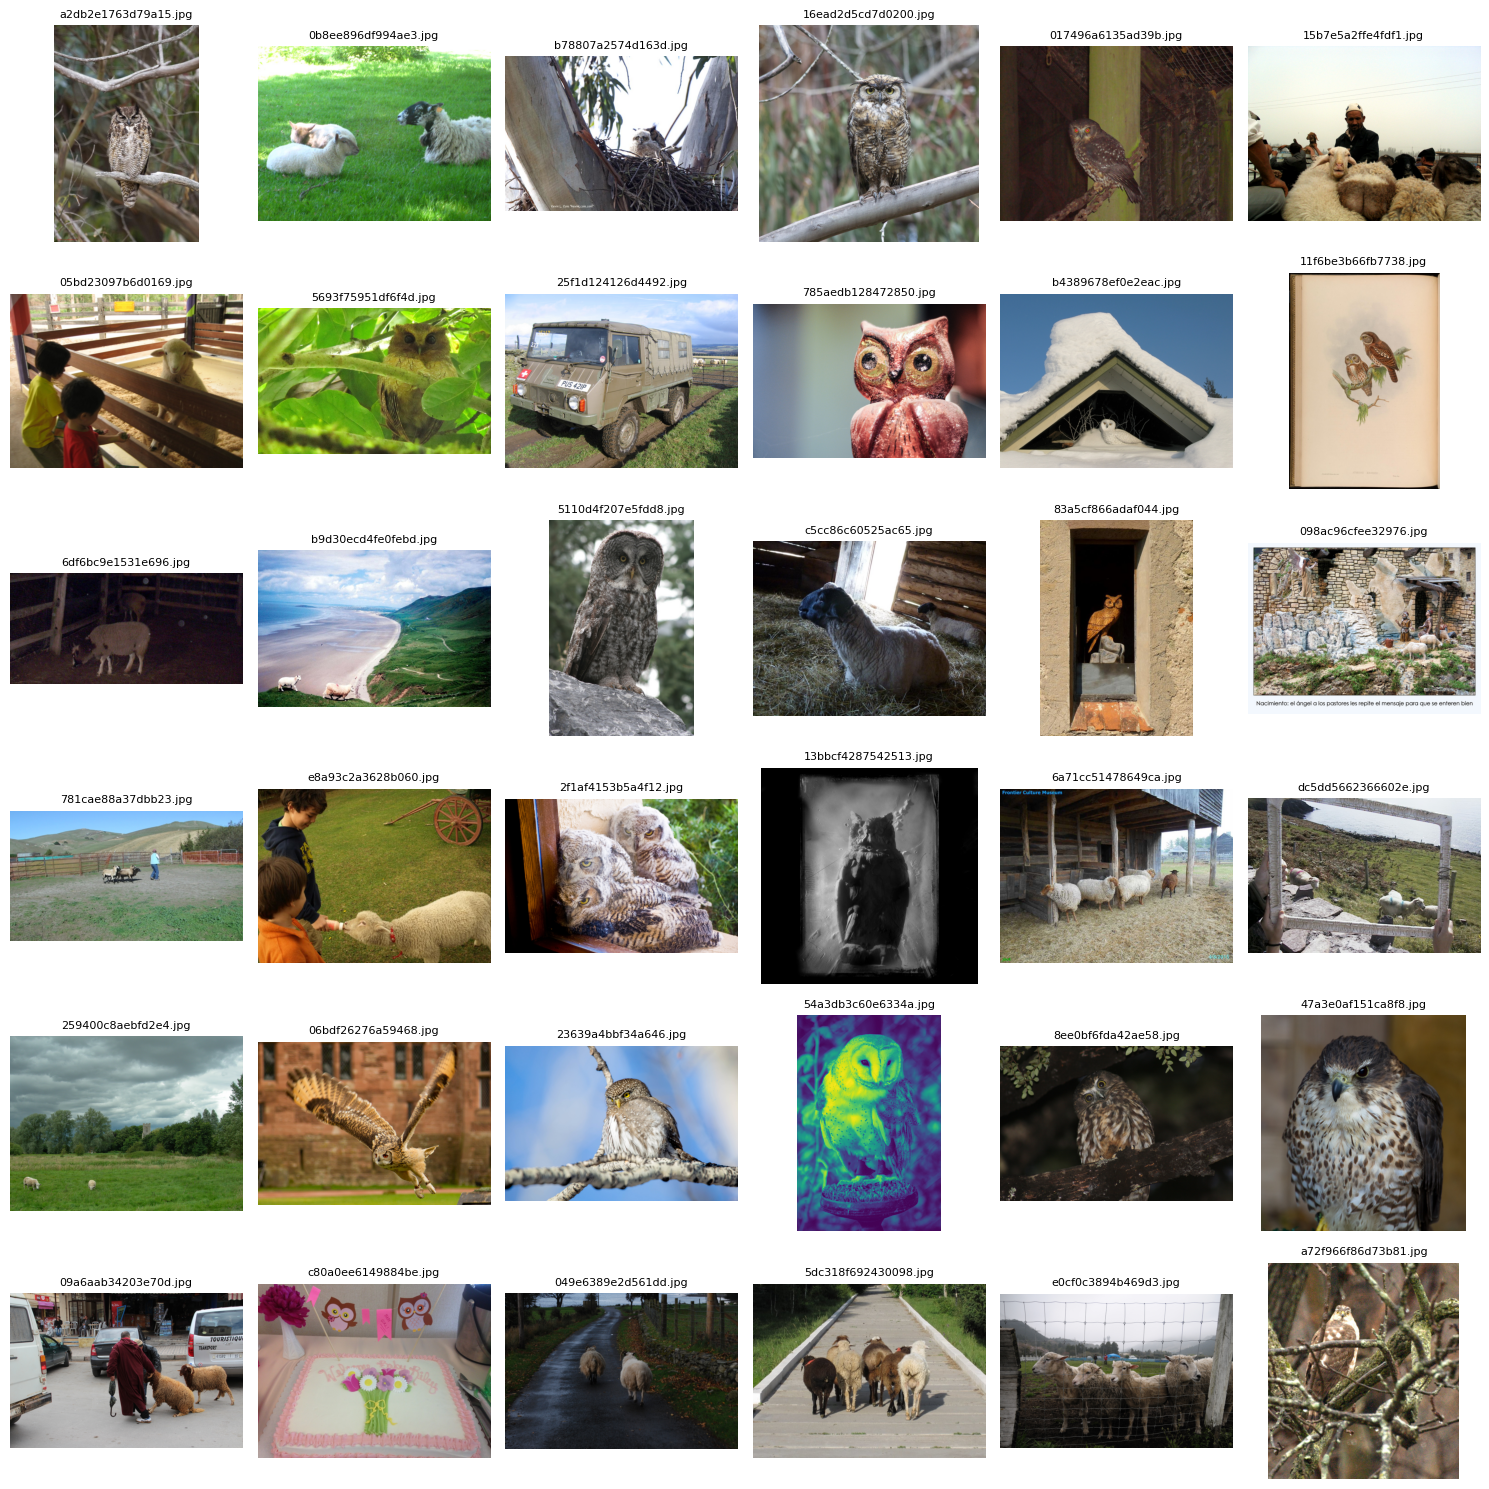

After previewing some of the dataset these augmentations were selected:
*   hsv_h to adjust the colors to make the model robust to color variations
*   hsv_v to change brightness to simulate different lighting conditions
*   degrees to rotate images to handle different orientations.
*   shear to distort images to simulate perspective changes.
*   scale to resize images to handle varying object sizes and distances.


List of all augmentations and ranges availabe at https://docs.ultralytics.com/modes/train/#augmentation-settings-and-hyperparameters

## Load a Pre-trained YOLOv8 Model and Fine-Tune:




This section covers loading pretrained model and fine tuning it with and without augmentations. Both models were set to train for 10 epochs and take a batch size of 16

#### Without augmentations

In [11]:
# Load a COCO-pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Train the model on the Open Images V7 dataset
results = model.train(data='/content/drive/MyDrive/open-imagesv7.yaml', epochs=20, imgsz=640, batch=16)

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/open-imagesv7.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/content/datasets/fiftyone/open-images-v7/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to '/content/datasets/fiftyone/open-images-v7/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [8.8s elapsed, 0s remaining, 467.9Mb/s]       


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [8.8s elapsed, 0s remaining, 467.9Mb/s]       


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/content/datasets/fiftyone/open-images-v7/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmp6o5vflyn/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v6/oidv6-train-annotations-bbox.csv' to '/content/datasets/fiftyone/open-images-v7/train/labels/detections.csv'


Only found 2550 (<1743042) samples matching your requirements


INFO:fiftyone.utils.openimages:Downloading 2550 images


 100% |█████████████████| 2550/2550 [4.5m elapsed, 0s remaining, 9.9 files/s]       


INFO:eta.core.utils: 100% |█████████████████| 2550/2550 [4.5m elapsed, 0s remaining, 9.9 files/s]       


Dataset info written to '/content/datasets/fiftyone/open-images-v7/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/content/datasets/fiftyone/open-images-v7/info.json'


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


 100% |███████████████| 2550/2550 [13.0s elapsed, 0s remaining, 218.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2550/2550 [13.0s elapsed, 0s remaining, 218.0 samples/s]      


Dataset 'open-images-v7-train-1743042' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-train-1743042' created


 100% |███████████████| 2550/2550 [13.1s elapsed, 0s remaining, 150.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2550/2550 [13.1s elapsed, 0s remaining, 150.5 samples/s]      


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/content/datasets/fiftyone/open-images-v7/validation' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/validation/validation-images-with-rotation.csv' to '/content/datasets/fiftyone/open-images-v7/validation/metadata/image_ids.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/content/datasets/fiftyone/open-images-v7/validation/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmp8kgvmgua/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv' to '/content/datasets/fiftyone/open-images-v7/validation/labels/detections.csv'


Only found 92 (<41620) samples matching your requirements


INFO:fiftyone.utils.openimages:Downloading 92 images


 100% |█████████████████████| 92/92 [9.7s elapsed, 0s remaining, 9.7 files/s]       


INFO:eta.core.utils: 100% |█████████████████████| 92/92 [9.7s elapsed, 0s remaining, 9.7 files/s]       


Dataset info written to '/content/datasets/fiftyone/open-images-v7/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/content/datasets/fiftyone/open-images-v7/info.json'


Loading 'open-images-v7' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'validation'


 100% |███████████████████| 92/92 [702.5ms elapsed, 0s remaining, 132.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 92/92 [702.5ms elapsed, 0s remaining, 132.4 samples/s]      


Dataset 'open-images-v7-validation-41620' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-validation-41620' created


Directory '/content/datasets/open-images-v7' already exists; export will be merged with existing files


 100% |███████████████████| 92/92 [392.2ms elapsed, 0s remaining, 234.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 92/92 [392.2ms elapsed, 0s remaining, 234.6 samples/s]      


Dataset download success ✅ (577.1s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/open-images-v7/labels/train... 2550 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2550/2550 [00:01<00:00, 1739.65it/s]


train: New cache created: /content/datasets/open-images-v7/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/open-images-v7/labels/val... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<00:00, 1325.21it/s]

val: New cache created: /content/datasets/open-images-v7/labels/val.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.75G      1.096      1.985      1.314         20        640: 100%|██████████| 160/160 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         92        152      0.324       0.51      0.392      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.47G      1.253      1.717      1.428         20        640: 100%|██████████| 160/160 [01:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         92        152      0.458      0.552      0.497      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.46G      1.309      1.682      1.477         18        640: 100%|██████████| 160/160 [01:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         92        152      0.462      0.545      0.497      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.28G      1.316      1.612      1.471         46        640: 100%|██████████| 160/160 [01:10<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]

                   all         92        152      0.502      0.588      0.573       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.41G      1.276      1.478       1.44         21        640: 100%|██████████| 160/160 [01:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         92        152      0.469      0.547      0.433      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.28G      1.232       1.42      1.421         24        640: 100%|██████████| 160/160 [01:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         92        152      0.637      0.596      0.614      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.28G      1.184      1.362      1.398         15        640: 100%|██████████| 160/160 [01:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         92        152      0.495      0.557      0.547      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.28G      1.148       1.29      1.369         21        640: 100%|██████████| 160/160 [01:10<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         92        152      0.662      0.715      0.682      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       2.4G      1.141      1.253      1.353         43        640: 100%|██████████| 160/160 [01:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         92        152      0.618      0.663      0.656      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.28G      1.094       1.19       1.32         15        640: 100%|██████████| 160/160 [01:10<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         92        152      0.732      0.614      0.653      0.494


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.56G        1.1      1.162      1.339          6        640: 100%|██████████| 160/160 [01:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         92        152       0.74      0.616      0.699      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.4G      1.078      1.105      1.326         19        640: 100%|██████████| 160/160 [01:07<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         92        152       0.68      0.708      0.681      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.26G      1.049      1.021      1.301         16        640: 100%|██████████| 160/160 [01:07<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         92        152      0.687      0.685      0.683       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.28G      1.023     0.9877       1.28         13        640: 100%|██████████| 160/160 [01:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         92        152      0.708      0.769      0.727       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.26G     0.9982     0.9396      1.264          7        640: 100%|██████████| 160/160 [01:07<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         92        152      0.755      0.692      0.712      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.43G     0.9613     0.8802      1.232         10        640: 100%|██████████| 160/160 [01:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         92        152      0.706      0.791      0.729      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.38G     0.9406     0.8452      1.206          8        640: 100%|██████████| 160/160 [01:06<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         92        152      0.774      0.754      0.767      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.4G      0.901     0.8178      1.186         10        640: 100%|██████████| 160/160 [01:06<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all         92        152      0.739      0.727      0.766      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.41G     0.8845     0.7717      1.173          8        640: 100%|██████████| 160/160 [01:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all         92        152      0.752      0.743      0.762      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.4G     0.8663     0.7528       1.16         10        640: 100%|██████████| 160/160 [01:07<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         92        152      0.757      0.762      0.763      0.644



20 epochs completed in 0.406 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


                   all         92        152      0.756      0.762      0.763      0.639
                   Owl         30         30      0.964      0.967      0.965      0.862
                 Sheep         62        122      0.548      0.557       0.56      0.416
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train3


In [19]:
import shutil

# Path to the folder you want to zip
folder_to_zip = '/content/runs/detect/train3'
output_zip_file = '/content/runs.zip'

# Zip the folder
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zipped folder
from google.colab import files
files.download(output_zip_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### With augmentations

In [36]:
# Load a COCO-pretrained YOLOv8n model
model2 = YOLO('yolov8n.pt')

# Train the model on the Open Images V7 dataset
results2 = model2.train(data='/content/drive/MyDrive/open-imagesv7_augmentations.yaml', epochs=20, imgsz=640, batch=16)

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/open-imagesv7_augmentations.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning /content/datasets/open-images-v7/labels/train.cache... 2550 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2550/2550 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/open-images-v7/labels/val.cache... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.82G      1.096      1.985      1.314         20        640: 100%|██████████| 160/160 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         92        152      0.324       0.51      0.392      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.6G      1.253      1.717      1.428         20        640: 100%|██████████| 160/160 [01:16<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         92        152      0.458      0.552      0.497      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.58G      1.309      1.682      1.477         18        640: 100%|██████████| 160/160 [01:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         92        152      0.462      0.545      0.497      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.52G      1.316      1.612      1.471         46        640: 100%|██████████| 160/160 [01:14<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         92        152      0.502      0.588      0.573       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.52G      1.276      1.478       1.44         21        640: 100%|██████████| 160/160 [01:15<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         92        152      0.469      0.547      0.433      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.39G      1.232       1.42      1.421         24        640: 100%|██████████| 160/160 [01:14<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         92        152      0.637      0.596      0.614      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.39G      1.184      1.362      1.398         15        640: 100%|██████████| 160/160 [01:15<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         92        152      0.495      0.557      0.547      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.39G      1.148       1.29      1.369         21        640: 100%|██████████| 160/160 [01:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         92        152      0.662      0.715      0.682      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.51G      1.141      1.253      1.353         43        640: 100%|██████████| 160/160 [01:14<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         92        152      0.618      0.663      0.656      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.51G      1.094       1.19       1.32         15        640: 100%|██████████| 160/160 [01:12<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all         92        152      0.732      0.614      0.653      0.494


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.69G        1.1      1.162      1.339          6        640: 100%|██████████| 160/160 [01:13<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all         92        152       0.74      0.616      0.699      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.51G      1.078      1.105      1.326         19        640: 100%|██████████| 160/160 [01:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]

                   all         92        152       0.68      0.708      0.681      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.37G      1.049      1.021      1.301         16        640: 100%|██████████| 160/160 [01:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         92        152      0.687      0.685      0.683       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.52G      1.023     0.9877       1.28         13        640: 100%|██████████| 160/160 [01:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         92        152      0.708      0.769      0.727       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.37G     0.9982     0.9396      1.264          7        640: 100%|██████████| 160/160 [01:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         92        152      0.755      0.692      0.712      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.55G     0.9613     0.8802      1.232         10        640: 100%|██████████| 160/160 [01:12<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         92        152      0.706      0.791      0.729      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.5G     0.9406     0.8452      1.206          8        640: 100%|██████████| 160/160 [01:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         92        152      0.774      0.754      0.767      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.51G      0.901     0.8178      1.186         10        640: 100%|██████████| 160/160 [01:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         92        152      0.739      0.727      0.766      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.53G     0.8845     0.7717      1.173          8        640: 100%|██████████| 160/160 [01:15<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         92        152      0.752      0.743      0.762      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.51G     0.8663     0.7528       1.16         10        640: 100%|██████████| 160/160 [01:12<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         92        152      0.757      0.762      0.763      0.644



20 epochs completed in 0.429 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]


                   all         92        152      0.756      0.762      0.763      0.639
                   Owl         30         30      0.964      0.967      0.965      0.862
                 Sheep         62        122      0.548      0.557       0.56      0.416
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train6


In [ ]:
import shutil

# Path to the folder you want to zip
folder_to_zip = '/content/runs/detect/train5'
output_zip_file = '/content/runs/last_run.zip'

# Zip the folder
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zipped folder
from google.colab import files
files.download(output_zip_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model evaluation

Evaluation Metrics Interpretation

Precision (0.756): The model correctly predicted 75.6% of the detected objects.
Recall (0.762): The model successfully identified 76.2% of the actual objects in the dataset.
mAP50 (0.763): The mean Average Precision at an IoU threshold of 0.5 is 76.3%. The model has good localization accuracy when only a moderate overlap (50%) is required.
mAP50-95 (0.639): The mean Average Precision across stricter IoU thresholds is 63.9%, indicating the model’s ability to precisely locate objects is slightly lower when higher overlap is required.
Augmentations didn't make a difference in this case, suggesting that their set values were not as significant as I have originaly tought.


Owl:

Precision (0.964): The model is highly accurate in detecting owls, with 96.4% of its predictions being correct.
Recall (0.967): The model successfully identifies 96.7% of all owls in the dataset.
mAP50 (0.965): The model is very accurate at localizing owls, with a 96.5% precision when a 50% overlap is considered.
mAP50-95 (0.862): Even with stricter IoU thresholds, the model maintains high precision (86.2%) for owl detection.

Sheep:

Precision (0.548): The model's precision for detecting sheep is lower, with only 54.8% of sheep detections being correct.
Recall (0.557): The model successfully identifies 55.7% of all sheep in the dataset.
mAP50 (0.560): The localization accuracy for sheep is moderate, with a 56.0% precision at a 50% overlap threshold.
mAP50-95 (0.416): The model struggles more with precisely locating sheep, with a lower precision of 41.6% across stricter IoU thresholds.

Summary

 The model is very good at detecting owls but has more difficulty with sheep, indicated by lower precision, recall, and mAP scores for sheep. This may suggest that sheep are harder to detect due to factors like appearance variability, occlusion, or background complexity.

To get better results it could be beneficial to try for a different augmentation values and hiperparametar optimisation as welll as higher epoch count.


In [23]:
model_path = '/content/drive/MyDrive/best_model.pt'
model.save(model_path)


# Using the model

This part is to make predictions using already trained model, make sure that the imnport statments at the top of the notebook have been run and that the path to the model and picture you want to make the predictions on are correct

In [24]:
from ultralytics import YOLO

# Make sure that this is the path you saved best_model.pt at
model_path = '/content/drive/MyDrive/best_model.pt'
model_3 = YOLO(model_path)


In [28]:
# Provide the path to the image you want to make predictions on
image_path = '/content/drive/MyDrive/sova.jpg'

results = model_3.predict(image_path)
result = results[0]
result.show()



image 1/1 /content/drive/MyDrive/sova.jpg: 640x640 1 Owl, 15.1ms
Speed: 6.0ms preprocess, 15.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


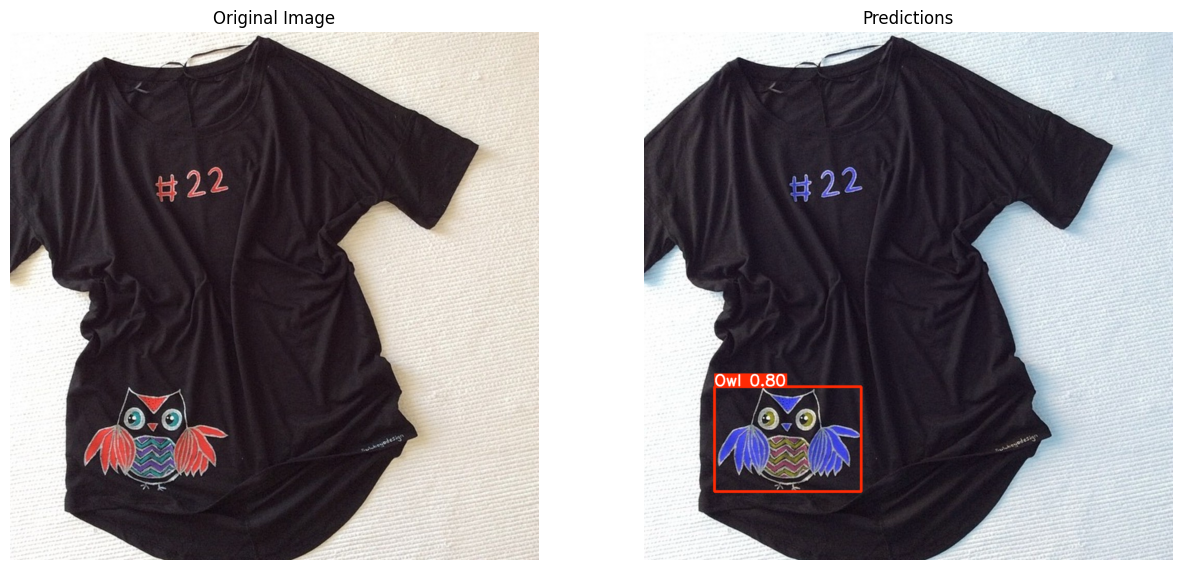

In [35]:
image = Image.open(image_path)
image_np = np.array(image)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].imshow(image_np)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(result.plot())
ax[1].set_title('Predictions')
ax[1].axis('off')

plt.show()